In [188]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [189]:
df = pd.read_csv("uber.csv")

In [190]:

df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [191]:
df.dropna(inplace = True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


<Axes: xlabel='fare_amount', ylabel='Count'>

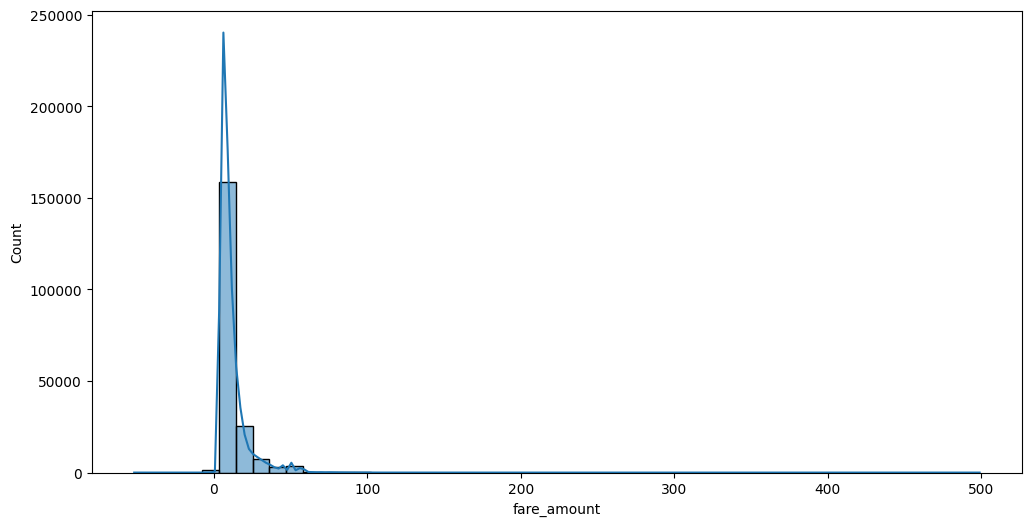

In [193]:
plt.figure(figsize = (12,6))
sns.histplot(df["fare_amount"],bins = 50,kde = True)

In [194]:
df = df[df["fare_amount"]>0]

<Axes: xlabel='fare_amount', ylabel='Count'>

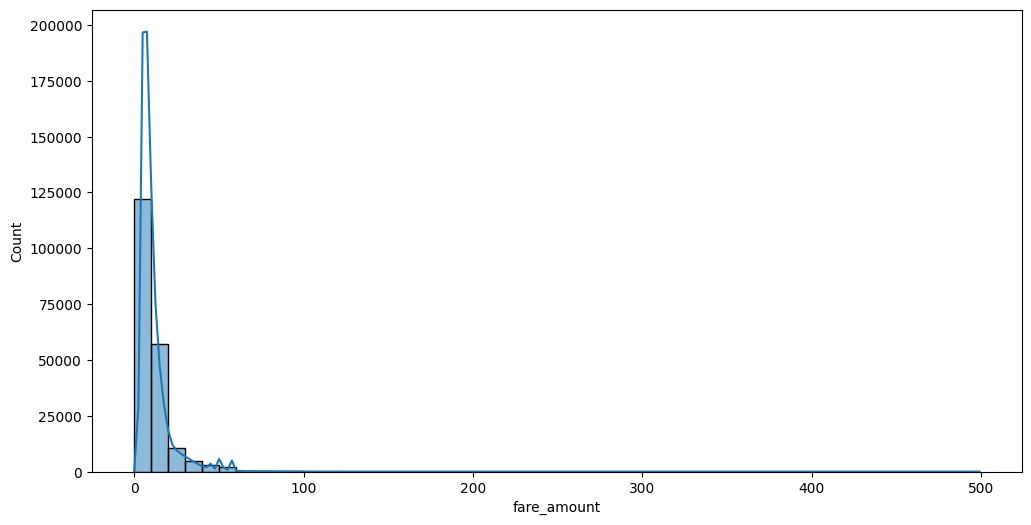

In [195]:
plt.figure(figsize = (12,6))
sns.histplot(df["fare_amount"],bins = 50,kde = True)

In [196]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"],errors = "coerce")

In [197]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [198]:
df["hour"] = df["pickup_datetime"].dt.hour

In [199]:
df["day"] = df["pickup_datetime"].dt.day

In [200]:
df["month"] = df["pickup_datetime"].dt.month
df["year"] = df["pickup_datetime"].dt.year

In [201]:
df = df[df["passenger_count"].between(1,6)]

In [202]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014


In [204]:
df.drop(["pickup_datetime","key","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],inplace = True,axis = 1)

In [205]:
df.head()

,Unnamed: 0,fare_amount,passenger_count,hour,day,month,year
0,24238194,7.5,1,19,7,5,2015
1,27835199,7.7,1,20,17,7,2009
2,44984355,12.9,1,21,24,8,2009
3,25894730,5.3,3,8,26,6,2009
4,17610152,16.0,5,17,28,8,2014


In [206]:
df.drop(["Unnamed: 0"],axis = 1,inplace = True)

In [207]:
df.head()

,fare_amount,passenger_count,hour,day,month,year
0,7.5,1,19,7,5,2015
1,7.7,1,20,17,7,2009
2,12.9,1,21,24,8,2009
3,5.3,3,8,26,6,2009
4,16.0,5,17,28,8,2014


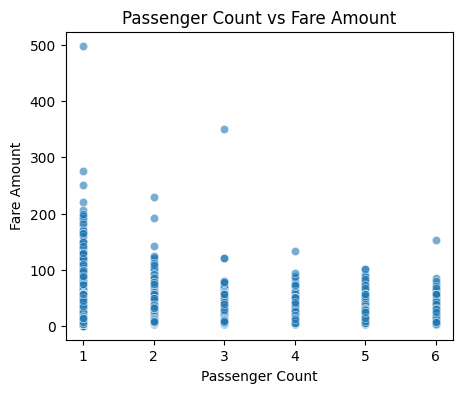

In [208]:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df["passenger_count"], y=df["fare_amount"], alpha=0.6)
    plt.title("Passenger Count vs Fare Amount")
    plt.xlabel("Passenger Count")
    plt.ylabel("Fare Amount")
    plt.show()

In [209]:
# sns.heatmap(df.corr(numeric_only = True))

In [210]:
df.columns

Index(['fare_amount', 'passenger_count', 'hour', 'day', 'month', 'year'], dtype='object')

In [211]:
X = df.drop("fare_amount",axis = 1)

In [212]:
y  = df["fare_amount"]

In [213]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [214]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size  = 0.2)

In [215]:
model= LinearRegression()

In [216]:
model.fit(x_train,y_train)

LinearRegression()

In [217]:
y_pred_nopca = model.predict(x_test)

In [218]:
r2_no_pca = r2_score(y_test, y_pred_nopca)
mae_no_pca = mean_absolute_error(y_test, y_pred_nopca)
rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred_nopca))

In [219]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"\nPCA reduced dataset to 2 components, explaining {explained_variance:.2f}% variance")

Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

lr_pca = LinearRegression()
lr_pca.fit(Xp_train, yp_train)
y_pred_pca = lr_pca.predict(Xp_test)


PCA reduced dataset to 2 components, explaining 62.70% variance


In [220]:
r2_pca = r2_score(yp_test, y_pred_pca)
mae_pca = mean_absolute_error(yp_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(yp_test, y_pred_pca))

In [221]:
comparison = pd.DataFrame({
    "Model": ["Without PCA", "With PCA"],
    "R² Score": [r2_no_pca, r2_pca],
    "MAE": [mae_no_pca, mae_pca],
    "RMSE": [rmse_no_pca, rmse_pca]
})

In [222]:
comparison

,Model,R² Score,MAE,RMSE
0,Without PCA,0.014448,6.027065,10.113081
1,With PCA,0.004457,6.077931,10.164211


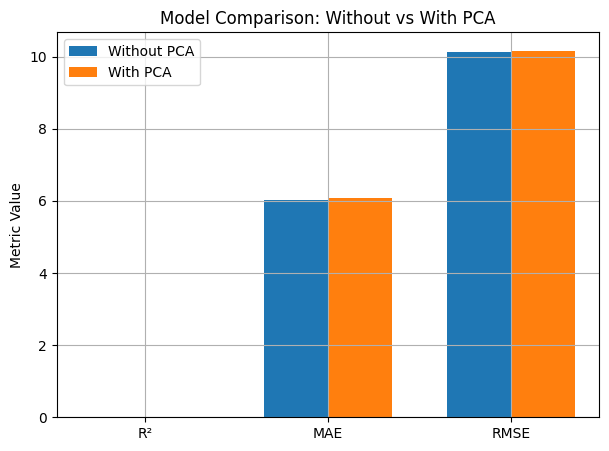

In [223]:
plt.figure(figsize=(7,5))
bar_width = 0.35
x = np.arange(3)
plt.bar(x - bar_width/2, [r2_no_pca, mae_no_pca, rmse_no_pca],
        width=bar_width, label='Without PCA')
plt.bar(x + bar_width/2, [r2_pca, mae_pca, rmse_pca],
        width=bar_width, label='With PCA')
plt.xticks(x, ['R²', 'MAE', 'RMSE'])
plt.ylabel("Metric Value")
plt.title("Model Comparison: Without vs With PCA")
plt.legend()
plt.grid(True)
plt.show()